### Criaremos um analisador de sentimentos. 
### Imagina que queremos assistir um filme, e o busquemos críticas sobre ele na internet. 
### Você lê, interpreta, e classifica a resenha como boa ou ruim. 
### É exatamente isso que ensinaremos o computador a fazer. 

## carregamos os dados

In [1]:
import pandas as pd 

resenhas = pd.read_csv('imdb-reviews-pt-br.csv')

# sera necessario limitar o numero de resenhas - 75% dos dados
resenhas = resenhas.sample(frac = 0.75).reset_index(drop=True)
resenhas.head()

,id,text_en,text_pt,sentiment
0,29909,I watched this movie last night and hoped for ...,Eu assisti a esse filme ontem à noite e espere...,neg
1,6154,SPOILER AHEAD! The mummy Lon Chaney Jr. is on ...,SPOILER À FRENTE! A múmia Lon Chaney Jr. está ...,neg
2,46366,I was so entertained throughout this insightfu...,Eu estava tão entretido ao longo deste documen...,pos
3,19768,What Ive seen of Wolfgang Petersens films has ...,O que eu vi dos filmes de Wolfgang Petersens f...,pos
4,14852,This movie has everything going for it: Fully ...,Este filme tem tudo para isso: personagens tot...,pos


## modificamos o dataframe

In [2]:
troca = {
    'neg' : 0,
    'pos' : 1
}

resenhas['sentiment_b'] = resenhas.sentiment.map(troca)

resenhas = resenhas.drop(columns = ["id" , "text_en", "sentiment"], axis = 1)
resenhas.head() 

,text_pt,sentiment_b
0,Eu assisti a esse filme ontem à noite e espere...,0
1,SPOILER À FRENTE! A múmia Lon Chaney Jr. está ...,0
2,Eu estava tão entretido ao longo deste documen...,1
3,O que eu vi dos filmes de Wolfgang Petersens f...,1
4,Este filme tem tudo para isso: personagens tot...,1


### verificamos o balanceamento dos dados

In [3]:
resenhas.sentiment_b.value_counts()

1    18548
0    18546
Name: sentiment_b, dtype: int64

# BAG OF WORDS
## devemos transformar os textos antes, para que os classificadores possam entender

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

vetorizador = CountVectorizer(lowercase = False , max_features = 50)
bag_of_words = vetorizador.fit_transform(resenhas.text_pt)
bag_of_words.shape

(37094, 50)

#### visualizando um trecho do nosso bag of words

##### a estrutura em cada linha indica uma resenha, e cada coluna temos todas a palavras que aparecem em todo o dataset
##### cada linha indica o numero de vezes que a palavra se repete na resenha

In [5]:
bw = pd.SparseDataFrame(
    bag_of_words, 
    columns = vetorizador.get_feature_names())
bw.iloc[[0]]

,Eu,ao,apenas,as,com,como,da,de,do,dos,...,seu,sobre,sua,são,também,tem,tão,um,uma,você
0,3,NaN,1,NaN,NaN,1,1,5,3,NaN,...,1,1,1,1,NaN,1,NaN,6,3,2


## estratificamos os dados 

In [6]:
from sklearn.model_selection import train_test_split

SEED = 20

treino, teste, classe_treino, classe_teste = train_test_split(
    bag_of_words,
    resenhas.sentiment_b,
    random_state = SEED)

## efetuamos a classificacao

In [7]:
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression(solver = 'lbfgs')
modelo.fit(treino,classe_treino)
modelo.score(teste,classe_teste)

0.6470778520595213

## gera visualizacao wordcloud
### o WordClound filtra os artigos e as pontuações
#### pip install wordcloud

In [8]:
# fixa a imagem no notebook
%matplotlib inline

from wordcloud import WordCloud
all_texts = [text for text in resenhas.text_pt]
# um texto enorme, com todas as resenhas
all_ = ' '.join(all_texts)
cloud_words = WordCloud(
    width = 800 , height = 500 , 
           max_font_size = 100,
                       collocations = False).generate(all_)

### gera visualizacao sem separar os sentimentos

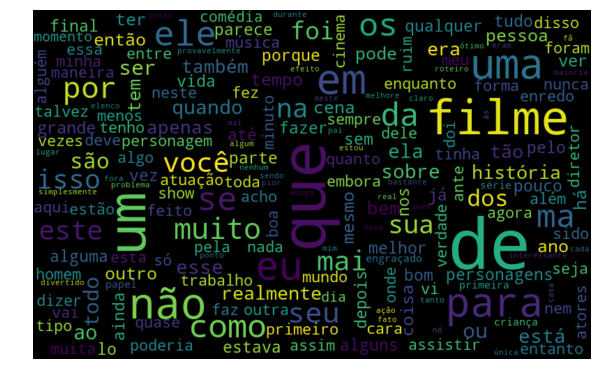

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,7))
plt.imshow(cloud_words , interpolation = 'bilinear')
plt.axis("off")
plt.show()

### gera visualizacao separando os sentimentos

#### sentimento positivo

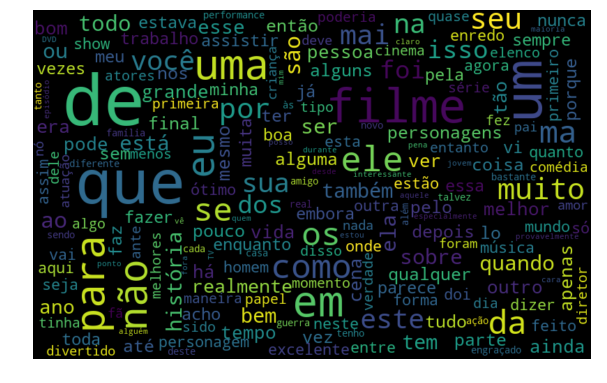

In [10]:
resenhas_positivas = resenhas.query("sentiment_b == 1")
all_texts_pos = [text for text in resenhas_positivas.text_pt]
all_pos = ' '.join(all_texts_pos)
cloud_words_pos = WordCloud(
    width = 800 , height = 500 , 
           max_font_size = 100,
                       collocations = False).generate(all_pos )
plt.figure(figsize = (10,7))
plt.imshow(cloud_words_pos , interpolation = 'bilinear')
plt.axis("off")
plt.show()

#### sentimento negativo

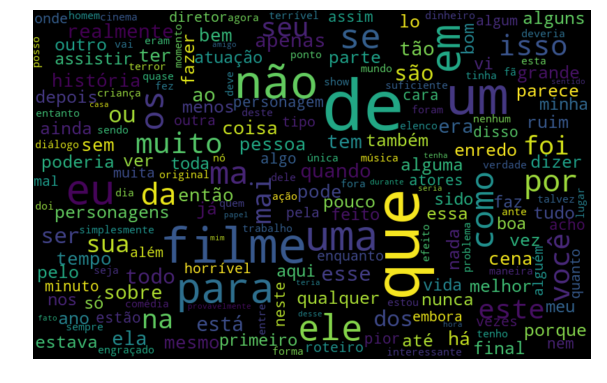

In [11]:
resenhas_negativas = resenhas.query("sentiment_b == 0")
all_texts_neg = [text for text in resenhas_negativas.text_pt]
all_neg = ' '.join(all_texts_neg)
cloud_words_neg = WordCloud(
    width = 800 , height = 500 , 
           max_font_size = 100,
                       collocations = False).generate(all_neg)
plt.figure(figsize = (10,7))
plt.imshow(cloud_words_neg , interpolation = 'bilinear')
plt.axis("off")
plt.show()